# Decision tree

In [16]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.io import loadmat
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from torch.utils.data import Subset

import torch
import pickle

import sys
sys.path.append('..')
from helper_functions import Helper
from dataset import BaseDataset, FeatureEngineeredDataset

file_path = "../../data/laser.mat"
mat_dict = loadmat(file_path)

dataset = FeatureEngineeredDataset(mat_dict, "X", "Y", "r2")

## 1. Entropy

Entropy: Expected information of a message

In [17]:
entropy = Helper.calculate_entropy(dataset.labels)
print(f"{entropy = }")

entropy = 1.0


Entropy from 1.0 is expected. 

## 2. Conditional Entropy

Conditional entropy for continious values. 

In [18]:
conditional_entropy = Helper.calculate_conditional_entropy(dataset.labels, dataset.inputs, threshold=0.7 )
print(f"{conditional_entropy = }")

conditional_entropy = {'inputs_above_threshold': 0.18927843126120164, 'inputs_below_threshold': 0.8142888743456993}


## 3. Information Gain

Information gain for one feature with continious values.

In [19]:
information_gain = Helper.calculate_continous_information_gain(dataset.labels, dataset.inputs, threshold=0.7)
print(information_gain)

0.40133972851845234


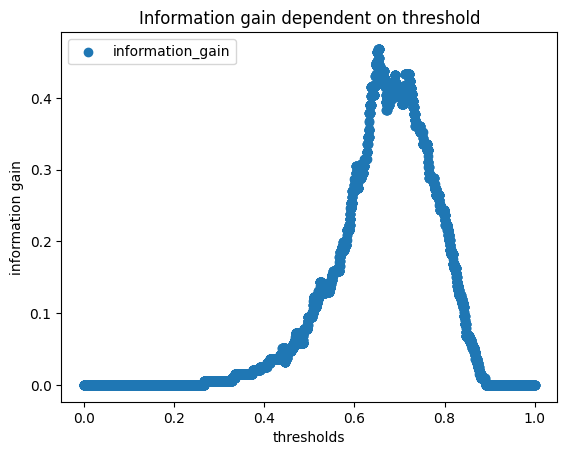

results['best_threshold'] = 0.6533, results['best_information_gain'] = 0.46825365885611736


In [20]:
step_size = 0.0001
thresholds = np.arange(0, 1 + step_size, step_size)

results = Helper.get_information_gain_values(dataset.labels, dataset.inputs, thresholds)

plt.scatter(thresholds, results['information_gain_values'], label='information_gain')
plt.xlabel('thresholds')
plt.ylabel('information gain')
plt.title('Information gain dependent on threshold')
plt.legend(loc='upper left')
plt.show()


print(f"{results['best_threshold'] = }, {results['best_information_gain'] = }")


**Result:** Best splitting criterium is r2 >= 0.6533. 

Information gain for continious values is used in C4.5.

## 4. Decision tree

### Load train and test data

In [21]:
with open('../../data_split_indices.pkl', 'rb') as f:
    split_data = pickle.load(f)

train_indices = split_data['train_indices']
test_indices = split_data['test_indices']

train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

train_inputs, train_labels = [], []
for x, y in train_dataset:
    train_inputs.append(x)
    train_labels.append(y)

train_inputs = np.array(train_inputs)
train_labels = np.array(train_labels)

test_inputs, test_labels = [], []
for x, y in test_dataset:
    test_inputs.append(x)
    test_labels.append(y)

test_inputs = np.array(test_inputs)
test_labels = np.array(test_labels)

if train_inputs.ndim == 1:
    train_inputs = train_inputs.reshape(-1, 1)
if test_inputs.ndim == 1:
    test_inputs = test_inputs.reshape(-1, 1)

### Train the decision tree

In [22]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=1)
model.fit(train_inputs, train_labels)

predictions = model.predict(test_inputs)

accuracy = np.mean(predictions == test_labels)
print(f'Accuracy: {accuracy}')


Accuracy: 0.5
